In [1]:
# https://github.com/CSSEGISandData/COVID-19 엑셀 자료 참조

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
sns.set(style = "whitegrid")

import missingno as msno

from IPython.display import set_matplotlib_formats

import warnings
warnings.filterwarnings("ignore")

In [90]:
# Mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
plt.rcParams["font.family"] = "Malgun Gothic"
# plt.rcParams["font.family"] = "AppleGothic"

# 별도로, 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
matplotlib.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

In [91]:
# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

---

### 최초 실행 시 

- Github 에서 날짜별 엑셀 자료를 불러와 데이터프레임으로 만들도록 하겠습니다.

In [261]:
def corona_data(mm, dd): # 월별, 일별 자료를 불러오는 corona_data 라는 함수를 만듭니다.
    
    # 엑셀 데이터 경로를 data_path 변수에 할당합니다.
    # format 함수를 사용해 월, 일을 변경 할 수 있도록 설정합니다.
    data_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{}-{}-2020.csv".format(mm, dd)
    
    # 엑셀 데이터를 df 변수에 데이터프레임으로 할당합니다.
    df = pd.read_csv(data_path)
    
    # Province/State 컬럼에 From Diamond Princes 가 포함되어 있을 경우, 데이터를 From Diamond Princes 로 변경합니다.
    df["Province/State"] = df["Province/State"].apply(lambda x : "From Diamond Princess" if "Diamond" in str(x) else x)      
    
    # Province/State 컬럼이 From Diamond Princess 일 경우, Country/Region 는 Others 로 변경 합니다.
    df.loc[df["Province/State"] == "From Diamond Princess", "Country/Region"] = "Others"
    
    # Last Update 컬럼을 Datetime 형태로 변경하고 연/월/일만 출력합니다.
    df["Last Update"] = pd.to_datetime(df["Last Update"])
    df["Last Update"] = df["Last Update"].dt.strftime('%Y-%m-%d')
    
    # 확진자, 사망자, 회복자 수를 더한 Total 컬럼을 만듭니다.
    df["Total"] = df["Confirmed"] + df["Deaths"] + df["Recovered"]
    
    # 사망자 수 비율을 나타내는 Death_Rate 컬럼을 만들고 소수점 2자리까지만 출력하도록 합니다.
    df["Death_Rate"] = ((df["Deaths"] / df["Total"]) * 100).round(2)
    
    # 회복자 수 비율을 나타내는 Recovered_Rate 컬럼을 만들고 소수점 2자리까지만 출력하도록 합니다.
    df["Recovered_Rate"] = ((df["Recovered"] / df["Total"]) * 100).round(2)
    
    # 숫자형 데이터 컬럼의 NAN 값을 0 으로 처리합니다.
    numerical_columns = ["Confirmed", "Deaths", "Recovered", "Total", "Death_Rate", "Recovered_Rate"]
    df[numerical_columns] = df[numerical_columns].fillna(0)
    
    # df 데이터를 반환합니다.
    return(df)

In [262]:
# 데이터를 담을 corona19 라는 빈 데이터프레임을 만듭니다.
corona19 = pd.DataFrame()

for mm in range(1, 3): # 1월 ~ 2월까지 반복합니다.
    for dd in range(1, 32): # 1일 ~ 31일까지 반복합니다.
        
        # try 이하 구문을 실행합니다.
        try:
            # corona_data 함수로 엑셀 데이터를 temp 변수에 할당합니다.
            # zfill 함수를 사용하여 0을 포함한 두 자리로 설정합니다.   
            temp = corona_data(str(mm).zfill(2), str(dd).zfill(2))
            
            # temp 에 할당한 데이터를 corona19 밑으로 추가합니다.            
            corona19 = corona19.append(temp, ignore_index = True)
        
        # 만약 try 구문에서 에러가 발생하면 except 이후를 실행합니다.
        except:
            pass

In [263]:
print(corona19.shape) # corona19 데이터의 row, column 수를 출력합니다.
corona19.tail() # corona19 데이터의 하위 5개 자료를 출력합니다.

(2480, 9)


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Total,Death_Rate,Recovered_Rate
2475,"Seattle, WA",US,2020-02-09,1.0,0.0,1.0,2.0,0.0,50.0
2476,"Tempe, AZ",US,2020-02-25,1.0,0.0,1.0,2.0,0.0,50.0
2477,From Diamond Princess,Others,2020-02-24,0.0,0.0,0.0,0.0,0.0,0.0
2478,From Diamond Princess,Others,2020-02-24,0.0,0.0,0.0,0.0,0.0,0.0
2479,From Diamond Princess,Others,2020-02-24,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
# corona19 데이터를 엑셀로 저장합니다.
corona19.to_csv("data/corona19.csv", index = False)

---

### 자료 추가 시

- 기존 데이터에 자료를 추가시, 아래 함수를 실행합니다.

In [259]:
def corona_data_add(mm, dd): # 월별, 일별 자료를 불러오는 corona_data_add 라는 함수를 만듭니다.
    
   # 엑셀 데이터 경로를 data_path 변수에 할당합니다.
    # format 함수를 사용해 월, 일을 변경 할 수 있도록 설정합니다.
    data_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{}-{}-2020.csv".format(mm, dd)
    
    # 엑셀 데이터를 df 변수에 데이터프레임으로 할당합니다.
    df = pd.read_csv(data_path)
    
    # Province/State 컬럼에 From Diamond Princes 가 포함되어 있을 경우, 데이터를 From Diamond Princes 로 변경합니다.
    df["Province/State"] = df["Province/State"].apply(lambda x : "From Diamond Princess" if "Diamond" in str(x) else x)      
    
    # Province/State 컬럼이 From Diamond Princess 일 경우, Country/Region 는 Others 로 변경 합니다.
    df.loc[df["Province/State"] == "From Diamond Princess", "Country/Region"] = "Others"
    
    # Last Update 컬럼을 Datetime 형태로 변경하고 연/월/일만 출력합니다.
    df["Last Update"] = pd.to_datetime(df["Last Update"])
    df["Last Update"] = df["Last Update"].dt.strftime('%Y-%m-%d')
    
    # 확진자, 사망자, 회복자 수를 더한 Total 컬럼을 만듭니다.
    df["Total"] = df["Confirmed"] + df["Deaths"] + df["Recovered"]
    
    # 사망자 수 비율을 나타내는 Death_Rate 컬럼을 만들고 소수점 2자리까지만 출력하도록 합니다.
    df["Death_Rate"] = ((df["Deaths"] / df["Total"]) * 100).round(2)
    
    # 회복자 수 비율을 나타내는 Recovered_Rate 컬럼을 만들고 소수점 2자리까지만 출력하도록 합니다.
    df["Recovered_Rate"] = ((df["Recovered"] / df["Total"]) * 100).round(2)
    
    # 숫자형 데이터 컬럼의 NAN 값을 0 으로 처리합니다.
    numerical_columns = ["Confirmed", "Deaths", "Recovered", "Total", "Death_Rate", "Recovered_Rate"]
    df[numerical_columns] = df[numerical_columns].fillna(0)
    
    # 기존에 저장된 엑셀 자료를 데이터프레임으로 할당합니다.
    corona19 = pd.read_csv("data/corona19.csv")
    
    # df 에 할당된 데이터를 기존 데이터 밑으로 추가합니다. 
    corona19 = corona19.append(df, ignore_index = True)
    
    # corona19 데이터를 반환합니다.
    return(corona19)

In [260]:
corona19 = corona_data_add(#월, #일 입력)

print(corona19.shape) # corona19 데이터의 row, column 수를 출력합니다.
corona19.tail() # corona19 데이터의 하위 5개 자료를 출력합니다.

(2480, 9)


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Total,Death_Rate,Recovered_Rate
2475,"Seattle, WA",US,2020-02-09,1.0,0.0,1.0,2.0,0.0,50.0
2476,"Tempe, AZ",US,2020-02-25,1.0,0.0,1.0,2.0,0.0,50.0
2477,From Diamond Princess,Others,2020-02-24,0.0,0.0,0.0,0.0,0.0,0.0
2478,From Diamond Princess,Others,2020-02-24,0.0,0.0,0.0,0.0,0.0,0.0
2479,From Diamond Princess,Others,2020-02-24,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# corona19 데이터를 엑셀로 저장합니다.
corona19.to_csv("data/corona19.csv", index = False)

---

### 글로벌 코로나 확진자, 사망자, 회복자 현황

In [276]:
# 일자를 기준으로 확진자, 사망자, 회복자 수의 합계를 그룹화 합니다.
date_group = pd.pivot_table(corona19, index = "Last Update",
                       values = ["Confirmed", "Deaths", "Recovered"],
                       aggfunc = "sum",
                       fill_value = 0)

# 그룹화된 데이터의 index 를 리셋 합니다.
date_group = date_group.reset_index()

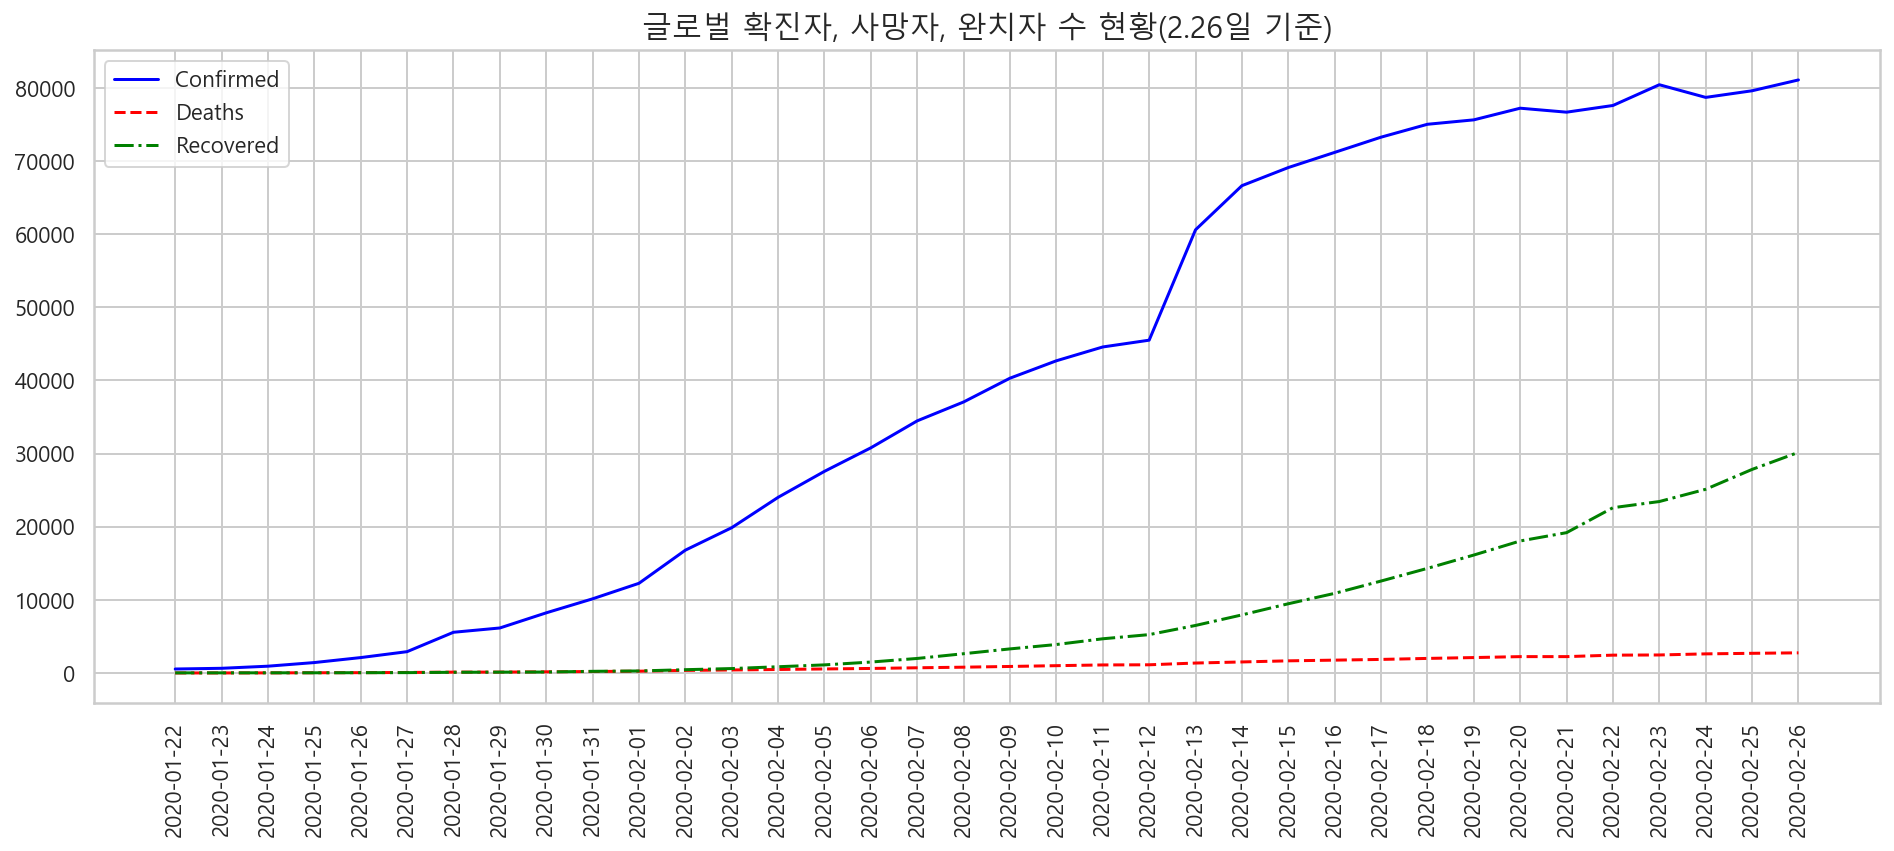

In [294]:
plt.rcParams["figure.figsize"] = (16, 6) # 차트 크기를 설정합니다.

# 일자별 확진자, 사망자, 회복자 수에 대한 line chart 를 그려줍니다.
plt.plot("Last Update", "Confirmed", data = date_group, color = "blue")
plt.plot("Last Update", "Deaths", data = date_group, color = "red", linestyle = "--")
plt.plot("Last Update", "Recovered", data = date_group, color = "green", linestyle = "-.")

# 차트 제목을 기재합니다.
plt.title("글로벌 확진자, 사망자, 완치자 수 현황(2.26일 기준)", fontsize = 15)
plt.xticks(rotation = 90) # x축 라벨을 90도 회전합니다.
plt.legend() # 라벨을 표기합니다.

plt.show() # 차트를 출력합니다.

- 1.22일부터 현재까지 확진자 수가 지속적으로 증가하고 있습니다.
- 사망자 수는 약간 증가한 반면, 회복자 수는 큰 폭의 상승세를 보이는 것을 알 수 있습니다.

In [296]:
# 일자를 기준으로 사망률, 회복률을 그룹화 합니다.
date_group_rate = pd.pivot_table(corona19, index = "Last Update",
                       values = ["Death_Rate", "Recovered_Rate"],
                       aggfunc = "mean",
                       fill_value = 0)

# 그룹화된 데이터의 index 를 리셋 합니다.
date_group_rate = date_group_rate.reset_index()

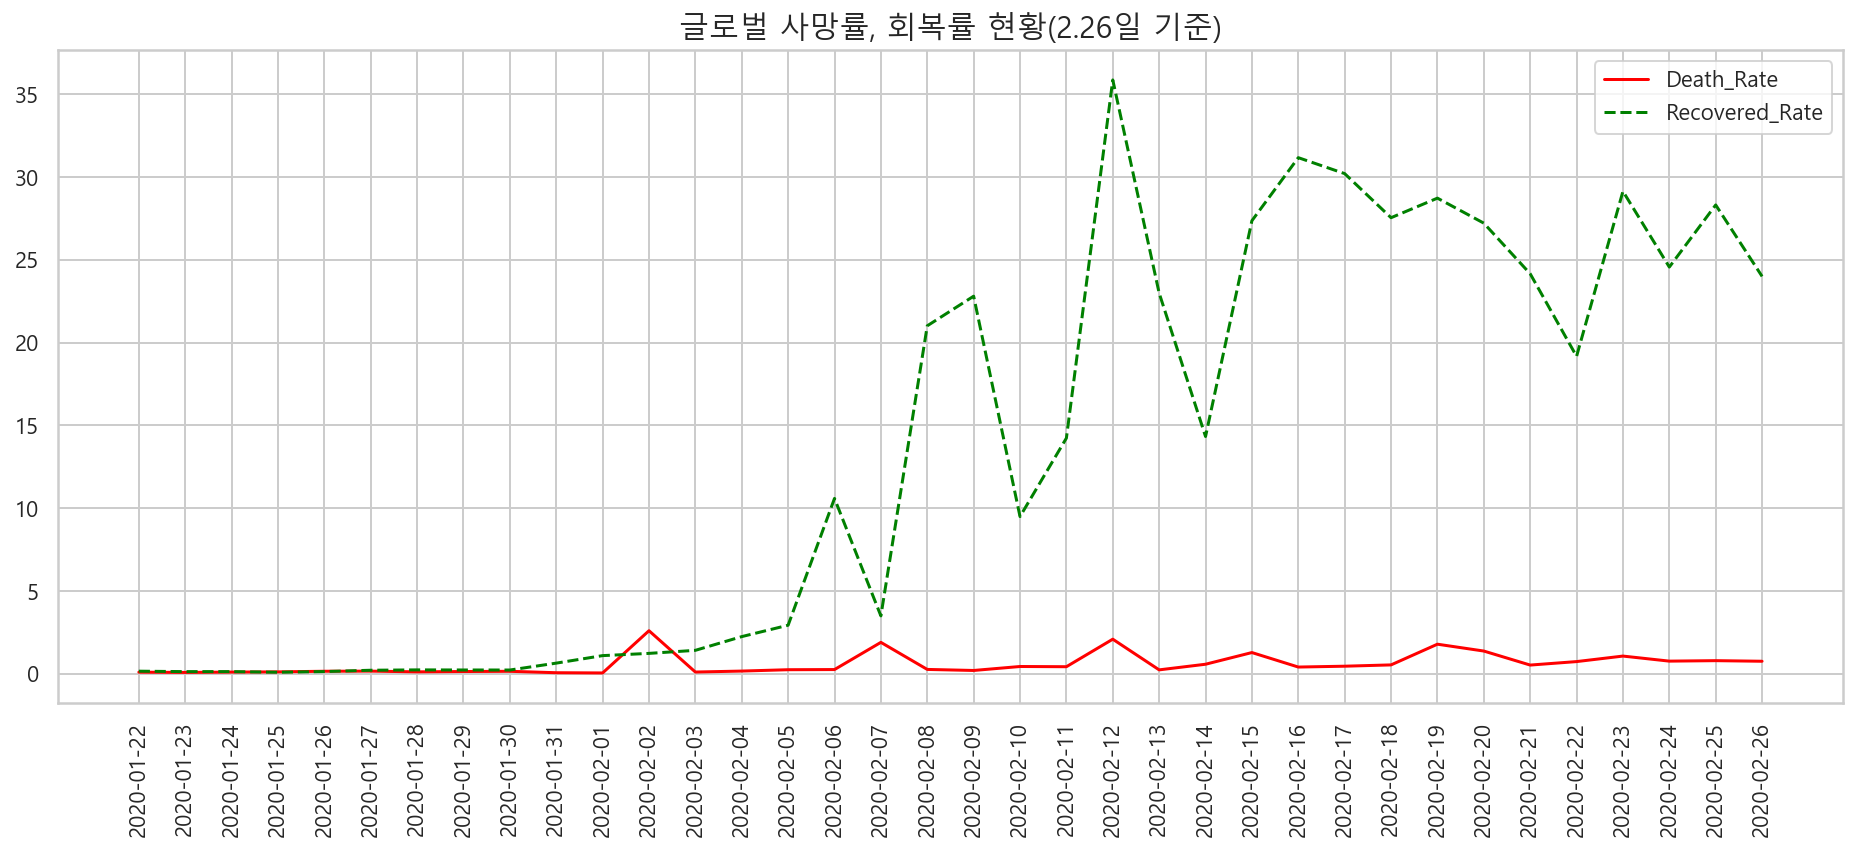

In [299]:
plt.rcParams["figure.figsize"] = (16, 6) # 차트 크기를 설정합니다.

# 일자별 사망률, 회복률 대한 line chart 를 그려줍니다.
plt.plot("Last Update", "Death_Rate", data = date_group_rate, color = "red")
plt.plot("Last Update", "Recovered_Rate", data = date_group_rate, color = "green", linestyle = "--")

# 차트 제목을 기재합니다.
plt.title("글로벌 사망률, 회복률 현황(2.26일 기준)", fontsize = 15)
plt.xticks(rotation = 90) # x축 라벨을 90도 회전합니다.
plt.legend() # 라벨을 표기합니다.

plt.show() # 차트를 출력합니다.

- 확진자 대비 사망률은 5% 아래로 지속 진행되고 있으며, 회복률은 꾸준히 상승하고 있는 모습을 보여주고 있습니다.

Text(0.5, 0, 'count')

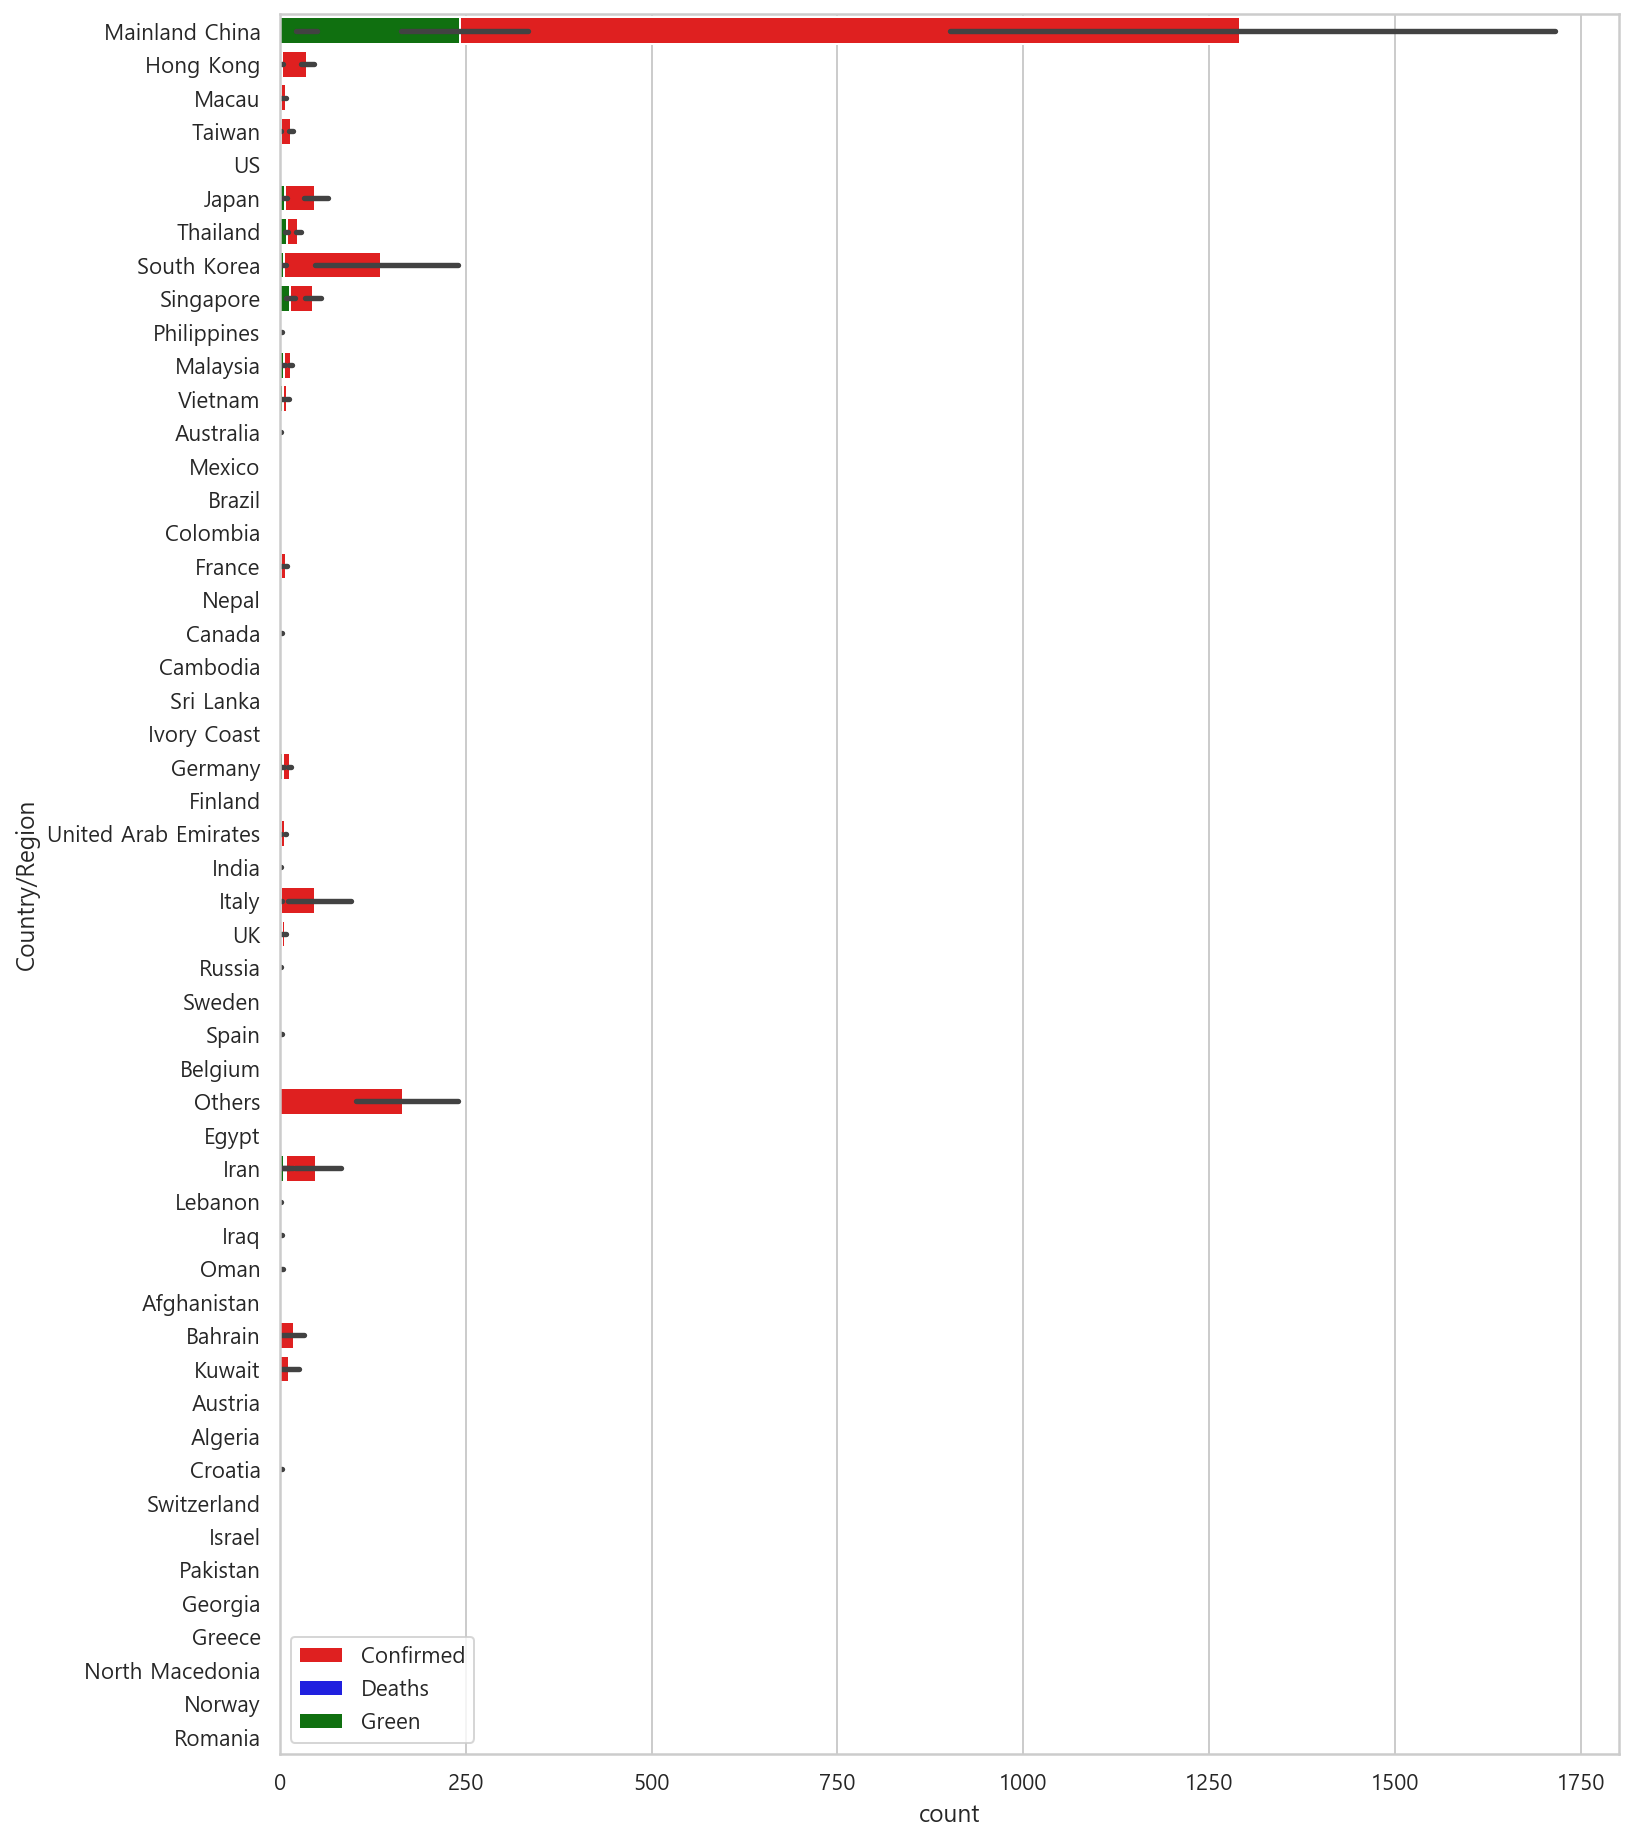

In [320]:
f, ax = plt.subplots(figsize = (12, 16))

sns.barplot(data = corona19, x = "Confirmed", y = "Country/Region", color = "red", label = "Confirmed")
sns.barplot(data = corona19, x = "Deaths", y = "Country/Region", color = "blue", label = "Deaths")
sns.barplot(data = corona19, x = "Recovered", y = "Country/Region", color = "Green", label = "Green")

plt.legend()
plt.xlabel("count")

In [295]:
corona19.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Total,Death_Rate,Recovered_Rate
0,Anhui,Mainland China,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0
1,Beijing,Mainland China,2020-01-22,14.0,0.0,0.0,0.0,0.0,0.0
2,Chongqing,Mainland China,2020-01-22,6.0,0.0,0.0,0.0,0.0,0.0
3,Fujian,Mainland China,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0
4,Gansu,Mainland China,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0
